|<img src="https://www.udp.cl/cms/wp-content/uploads/2021/06/UDP_LogoRGB_2lineas_Color_SinFondo.png" width="500" height="100">| <p> Ciencias de Datos para la Economía</p>  <p> Ingeniería Comercial </p> <p>Unidad II: Aprendizaje No Supervisado</p> <p>Análisis de Componentes Principales</p>|
|:---: | :--- |

## Analisis de Componentes Principales

- El análisis de componentes principales (Principal Component Analysis, PCA) nos puede ayudar a **solucionar problemas de reducción de dimensionalidad y extracción de características** en nuestros datos **de forma automática**.

- Técnica usada para descubrir la **forma en que covarían la variables numéricas**.

- Informalmente, se puede definir como **la técnica que intenta conseguir una representación de un conjunto de datos en un espacio de dimensionalidad más reducida, minimizando el error cuadrático cometido**.

- El algoritmo PCA **reduce la dimensionalidad mediante una transformación lineal** que escoge un nuevo sistema de coordenadas para el conjunto original de datos (es decir, **realiza una rotación del espacio d-dimensional**), en el cual la **varianza de mayor tamaño** del conjunto de datos **se recoge en el primer eje** (llamado el primer componente principal), **la segunda varianza más grande en el segundo eje**, y así sucesivamente.

- Este algoritmo **se basa en la matriz de covarianzas o correlaciones de los datos originales**, de forma que calcula los vectores propios de esta matriz y se aplica a los datos originales para conseguir la transformación lineal.

- **Combina múltiples variables predictoras numéricas** en un conjunto más pequeño de variables, que son **combinaciones lineales ponderadas** del conjunto original.

- El **conjunto más pequeño de variables, explica la mayor parte de la variabilidad** del conjunto completo de variables, reduciendo su dimensión.

- Las **ponderaciones** utilizadas para formar los componentes principales **muestran las contribuciones relativas de las variables originale**s a los nuevos componentes principales.


- Los coeficientes de los vectores asociados a cada componente marcan la importancia de cada uno de los nuevos atributos, de forma que los valores alto serán más importantes, mientras que podemos prescindir del resto.

- Cabe destacar que los **vectores propios nos indican la dirección** en tanto los **valores propios indican la magnitud de la transformación lineal**


### Calculo de vectores propios para reducción de dimensionalidad

- Podemos expresar el resultado del proceso de **extracción de características** como el producto matricial:
  $$S_{q;n} = P_{q;m} * D_{m;n}$$

  Donde D es el conjunto de datos original, S es la matriz de
los resultados (donde q << m), y P es la matriz de proyección,
que permite realizar la extracción de características

- El objetivo consiste en **encontrar la matriz $P$ que reduce la dimensionalidad** de los datos, minimizando el error cuadrático cometido en este proceso de reducción de la dimensionalidad.

- El proceso para el cálculo de la matriz de soluciones $D$ es el siguiente:

  1. Calcular la media de los datos de cada columna de la matriz D, para obtener un conjunto de datos centrados en su origen $\widehat{D}$ .
  
  2. Calcular la matriz de covarianza C de los datos como:
  
  $$C = \dfrac{1}{N} \widehat{D} * \widehat{D}^{T}$$
  
  3. Coger como matriz $P$, los $q$ primeros vectores propios con mayor valor propio asociado de la matriz de covarianza $C$.

  Aplicando el PCA obtenemos una serie de vectores $S = \{s_1;... ; s_q; ... ; s_m\}$ donde $m$ es el número de atributos. **Los coeficientes de los vectores asociados a cada componente marcan la importancia de cada uno de los nuevos atributos**.


  


### Aplicación PCA

- Dadas 𝑛 observaciones de 𝑝 variables en el dataset original, se buscan 𝑚 nuevas varaibles, llamadas componentes principales, donde 𝑚 < 𝑝 variables que sean combinaciones lineales de las 𝑝 originales y que estén incorreladas, recogiendo la mayor parte de la información o variabilidad
de los datos. Hay que tener presente que, **si las variables originales están incorreladas de partida, entonces no tiene sentido realizar un análisis de componentes principales**.

- Antes de iniciar este proceso, **debemos realizar un proceso de estandarización** de nuestros datos a fin de reducir la influencia que pueden ejercer los datos por encontrarse en distintas escalas de valores.

- Luego del proceso de estandarización de datos, **se procede a aplicar test estadísticos para determinar si existe correlación entre las variables estandarizadas**, por medio de la prueba de **correlación de Pearson** y la **prueba de esferidad de Bartlett**. Una vez superadas estas pruebas estadísticas, podemos iniciar nuestro proceso de extracción de componentes principales.

- Para **escoger la cantidad de componentes a utilizar aplicaremos el índice KMO de Kaiser-Meyer-Olkin** y su criterio de selección. Finalmente hemos determinado la cantidad de componentes principales para la creación de nuestro nuevo dataset.

### Aplicación PCA

In [1]:
# Importar set de datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Cargar el conjunto de datos "USArrests"
data = sm.datasets.get_rdataset("USArrests",  "datasets").data

# Ahora 'df' contiene el conjunto de datos "USArrests"
data.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
#@title calcular media
data.apply(lambda x: np.mean(x))

,0
Murder,7.788
Assault,170.760
UrbanPop,65.540
Rape,21.232


In [4]:
#@title calcular varianza
data.apply(lambda x: np.var(x))

,0
Murder,18.591056
Assault,6806.262400
UrbanPop,205.328400
Rape,85.974576


In [5]:
data.apply(lambda x: np.std(x))

,0
Murder,4.311735
Assault,82.500075
UrbanPop,14.329285
Rape,9.272248


Si no se estandarizan las variables para que tengan media cero y desviación estándar 1 antes de realizar el estudio PCA, la variable *Insulin* dominará la mayoría de las componentes principales.

In [6]:
#@title Estandarizar dataset

#Instanciar y aplicar fit_transfor a dataset
data_std =  StandardScaler().fit_transform(data)

# Generar dataframe desde los datos estandarizados, agregando nombre de columnas.
df_data_std = pd.DataFrame(data_std, columns=data.columns)

In [7]:
df_data_std.iloc[:,:-1].apply(lambda x: np.mean(x).round(2))

,0
Murder,-0.0
Assault,0.0
UrbanPop,-0.0


In [8]:
df_data_std.iloc[:,:-1].apply(lambda x: np.var(x))

,0
Murder,1.0
Assault,1.0
UrbanPop,1.0


### Visualizaciones

Realizaremos una visualización de las variables para tener una idea preliminar de correlaciones entre éstas. Posteriormente, visualizaremos las varaiables correlacionadas, tanto con la data original cómo con la data estandarizada.

Se procede a graficar las variables que aparentemente están correladas, tanto con la data original cómo con la data normalizada

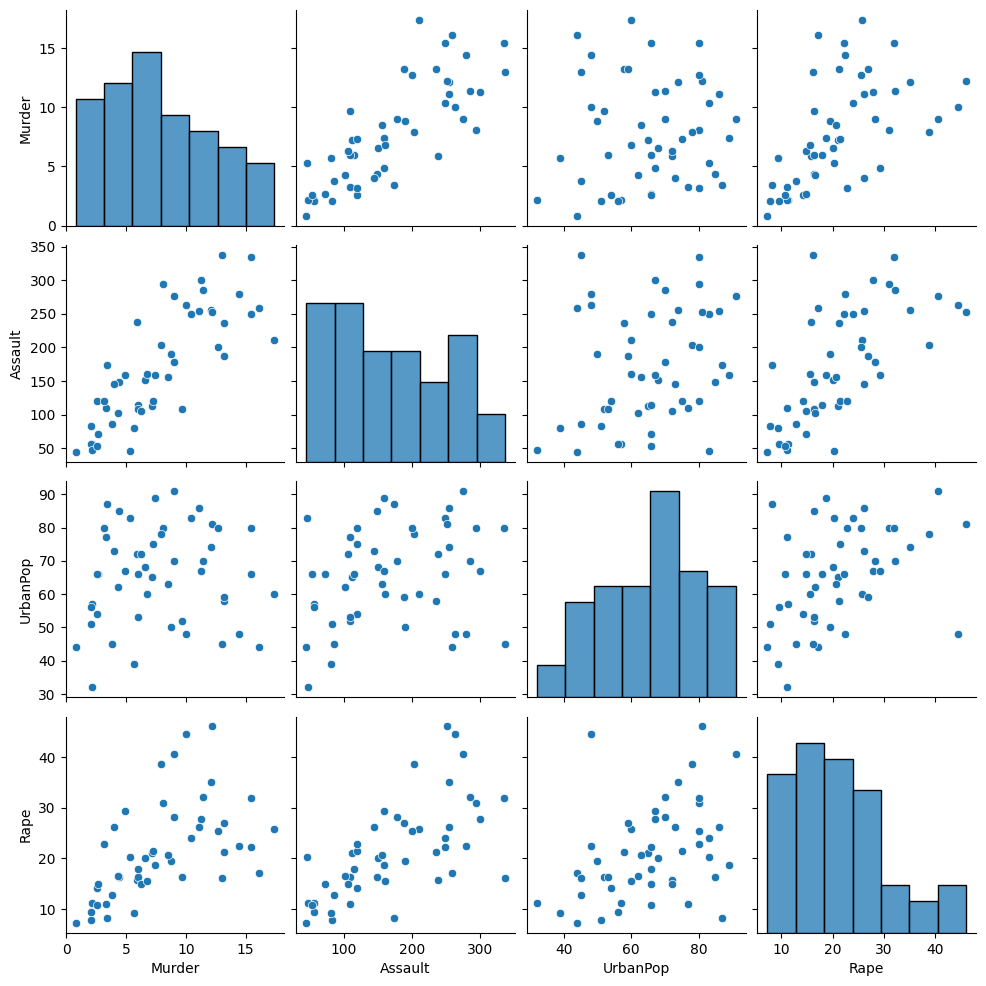

In [9]:
#@title Graficar pairplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)
plt.show()

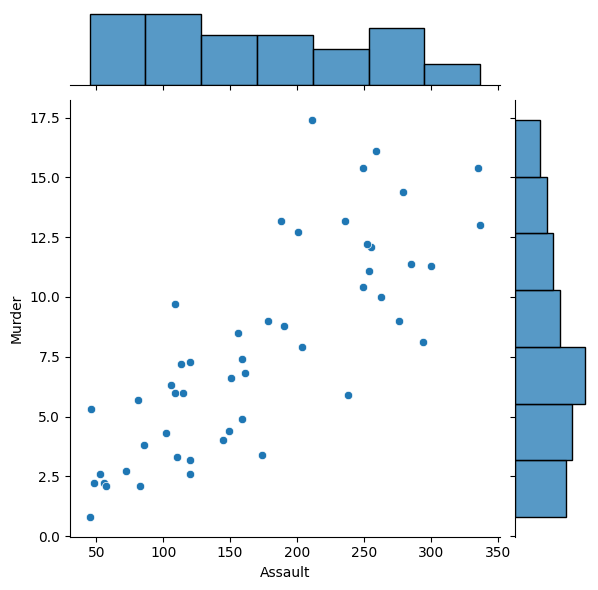

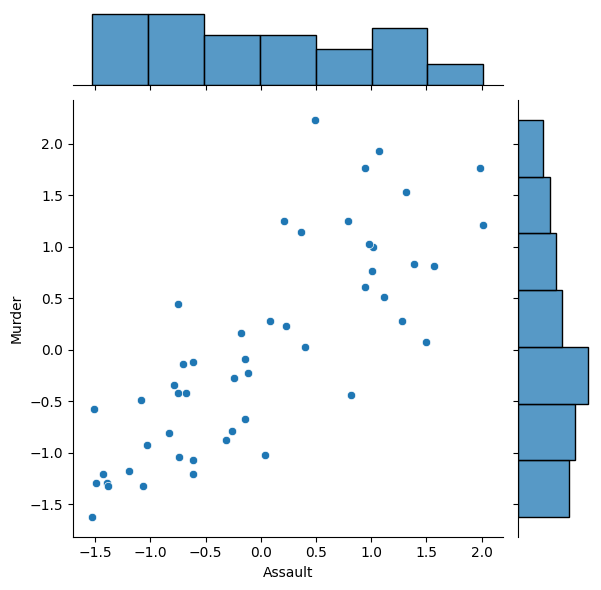

In [10]:
#@title Generar visualización de las variables correlacioadas desde los datos originales y standarizados
# Definir el tamaño de la figura
sns.jointplot(x="Assault", y="Murder", data=data)
sns.jointplot(x="Assault", y="Murder", data=df_data_std)
plt.show()

Vemos que la distribución de las gráficas se mantiene inalterable, solamente se ha modificado su escala de medición.

### Método Manual para determinar las componentes principales

Con nuestro set de datos Standarizado procedemos a realizar alguno test estadístico a fin de determinar si el conjunto de datos presenta correlación. Usaremos una data estandarizada en vez de una normalizada, con media 1 y desviación standard 0, a fin mantener las características originales del data set.

__a. Correlación de Pearson__

Este test nos muestra las correlaciones que presentan las variables del set de datos. El resultado arroja valores entre -1 y 1, donde:

-	Valores Cercanos a -1: Correlación Inversa entre variables, es decir, si una aumenta la otra disminuye, por ejemplo, horas de trabajo y horas de ocio, al aumentar las horas de trabajo, disminuye directamente proporcional las horas de descanso
-	Valores Cercanos a 0: Sin relación entre variables
-	Valores Cercanos a 1: Correlación positiva entre variables, es decir, si una aumenta la otra disminuye, por ejemplo, horas de estudio y rendimiento, al aumentar las horas de estudio, aumenta directamente el rendimiento académico (se supone, a no ser que seamos un valor atípico).

In [11]:
# Obtener matriz de correlación desde nuestr DataFrame Standarizado
matriz_corr = df_data_std.corr(method="pearson")
matriz_corr

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


A fin de facilitar la comprensión de la matriz de correlación agregaremos un mapa de calor, donde los cuadros con color rojo tenue son los que tienen una mayor correlación positiva y los más oscuros tienen una correalción negativa.

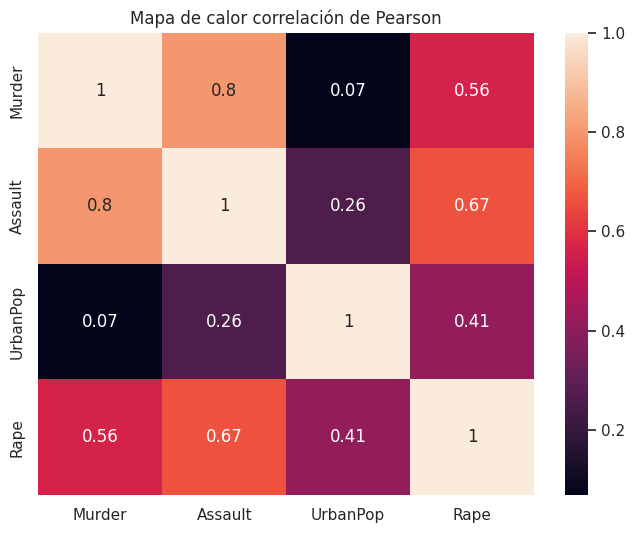

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(8,6)})
sns.heatmap(matriz_corr, annot = True).set_title('Mapa de calor correlación de Pearson')
plt.show()

__b. Prueba esferidad de Bartlet__

Comprueba que la matriz de correlaciones se ajuste a la matriz identidad, es decir, existe ausencia de correlación significativa entre las variables. Esto significa que la nube de puntos se ajustará a una esfera perfecta, expresando así la hipótesis nula por:

$$H_0:R=I⇒H_0:|R|=1$$

Donde, que el determinante de la matriz de correlaciones es igual a 1.


Bartlett introdujo un estadístico para este contraste basado en la matriz de correlacion $R$, que bajo hipótesis nula $H_0$ tiene una distribución $\chi^2=$ con $\dfrac{p(p-1)}{2}$ grados de libertad.

La expresión del estadístico es la siguiente:

$$\chi^2= −[n−1−\dfrac{2p+5}{6}] ln|R|$$


- Hipótesis nula $H_0$: La matriz de correlaciones $R$ es la matriz identidad. Por lo tanto no hay correlación entre variables **(PCA no es útil).**

- Hipótesis alternativa $H_1$. $R$ no es la matriz identidad. Por lo tanto hay correlaciones significativas entre las variables **(PCA es útil).**

  Donde:
  -	Si p < 0,05, indica que tenemos evidencias para rechazar la hipótesis nula, es decir las variables están correlacionadas y por tanto tiene mucho sentido llevar a cabo un proceso de reducción de dimensionalidad.

  -	Si p > 0,05, indica que no tenemos evidencias para rechazar la hipótesis nula, significa que las variables no están correlacionadas y por tanto no tiene mucho sentido llevar a cabo un proceso de reducción de dimensionalidad.
  Este contraste es útil cuando el tamaño muestral es pequeño.

In [ ]:
import math as m
import scipy.stats as stats

# se procede a calcular los valores para el estadistico chi-cuadro
n = len(df_data_std)
p = df_data_std.shape[1]
R = np.linalg.det(matriz_corr)

print(f'Cantidad de filas {n}')
print(f'Cantidad de columnas {p}')
print(f'Determinante de la matriz de correlación {R}')


Cantidad de filas 50
Cantidad de columnas 4
Determinante de la matriz de correlación 0.15180535152731117


In [ ]:
# Valor estadistico chi2
chi2 = -(n-1-((2*p+5)/6))*m.log(R)
print(f'Valor estadistico chi2: {chi2}')

Valor estadistico chi2: 88.28814686595535


Ahora procedermos a realizar el calculo de p-value, calculando en primer lugar los grados de libertad:
$$\text{grados de libertad} = \dfrac{p(p-1)}{2}$$

In [ ]:
gdl = (p*(p-1))/2
print(f'Grados de libertad: {gdl}')

Grados de libertad: 6.0


Finalmente calculamo el valor del estadistico de $\chi^2$ ajustado a los grados de libertad.

In [ ]:
pvalue = stats.chi2.pdf(chi2, gdl)
print(f'P-value: {pvalue}')


P-value: 3.282141641228002e-17


In [ ]:
if pvalue < 0.05:
    print("→ Se rechaza H₀: sí hay correlación significativa. PCA es apropiado.")
else:
    print("→ No se rechaza H₀: no hay correlación suficiente. PCA no es apropiado.")

El resultado muestra que p < 0,05, es decir que tenemos evidencias para rechazar la hipótesis nula, por lo tanto podemos decir que variables están correlacionadas. En otras palabras podemos llevar a cabo un proceso de reducción de dimensionalidad

__c.Indice KMO de Kaiser-Meyer-Olkin__

Hemos comprobado que si podemos realizar un proceso de reducción de dimensionalidad, aplicaremos el indice KMO. Este es un modelo busca determinar la cantidad de dimensiones a utilizar. Para esto, procedemos a calcular la matriz de covarianza de nuestro datos estandarizados traspuesto.

El coeficiente de correlación parcial mide la correlación existente entre ellas una vez se han descontado los efectos lineales del resto de variables

En el caso de que exista adecuación de los datos, el valor de los coeficientes de correlación parcial será pequeño y por tanto el valor de KMO será próximo a la unidad. Por tanto, valores bajos del indice KMO desaconsejan la utilización de la componente principal asociada. Los criterios para considerar el udo de la componente, según Kaiser es el siguiente:


| Criterio	| Valoración |
|--- |--- |
|0.9 < KMO ≤ 1|muy bueno |
|0.8 <  KMO ≤  0.9	|meritorio |
|0.7 <  KMO ≤  0.8	|mediano |
|0.6 <  KMO ≤ 0.7	|mediocre |
|0.5 <  KMO ≤ 0.6	|bajo |
|KMO ≤ 0.5	|inaceptable |


Procederemos a realizar los cálculos indicados a fin de indicar la cantidad de componentes a utilizar.

In [ ]:
# A.Obtener matriz de covarianza
matriz_cov = np.cov(df_data_std.T)
matriz_cov

array([[1.02040816, 0.81823807, 0.07099247, 0.57508044],
       [0.81823807, 1.02040816, 0.2641548 , 0.67881758],
       [0.07099247, 0.2641548 , 1.02040816, 0.41973595],
       [0.57508044, 0.67881758, 0.41973595, 1.02040816]])

Ahora calcularemos los autovalores y los autovectores.


- Autovalores: indican cuánta varianza del conjunto de datos está capturada por cada componente principal.

- Autovectores: son las direcciones (en el espacio original de los datos) hacia donde se proyectan los datos para maximizar la varianza.

A nosotros nos interesará los autovalores ya estos son los que capturan la varianza de los datos dentro de la matriz de covarianza

In [ ]:
# B.Computar los autovalores y autovectores
autovalores, autovector = np.linalg.eig(matriz_corr)

array([2.48024158, 0.98976515, 0.17343009, 0.35656318])

In [ ]:
# Varianza de capturada desde la matriz de autovalores y autovectores
print(f'autovalores:\n{autovalores}\n')
print(f'autovectores:\n{autovector}')

autovalores:
[2.48024158 0.98976515 0.17343009 0.35656318]

autovectores:
[[ 0.53589947  0.41818087  0.6492278  -0.34123273]
 [ 0.58318363  0.1879856  -0.74340748 -0.26814843]
 [ 0.27819087 -0.87280619  0.13387773 -0.37801579]
 [ 0.54343209 -0.16731864  0.08902432  0.81777791]]


sumaremos los autovalores para conocer la varianza total de los datos.

In [ ]:
autovalores.sum()

np.float64(4.0)

Los autovalores arrojan la varianza de cada una de las componentes. Note que tendremos la misma cantidad de componente y variables, sin embargo, eso no signfica que la componente representa a la variable, sino que representa a la varianza capturada de los datos.

A continuación calcularemos el porcentaje de varianza que cada uno de los componentes capturan

In [ ]:
pct_varianza_explicada = autovalores/sum(autovalores)
pct_varianza_explicada

array([0.62006039, 0.24744129, 0.04335752, 0.0891408 ])

In [ ]:
df_pct_varianza_explicada = pd.DataFrame(sorted(pct_varianza_explicada, reverse = True), index = ['1','2','3','4']).T

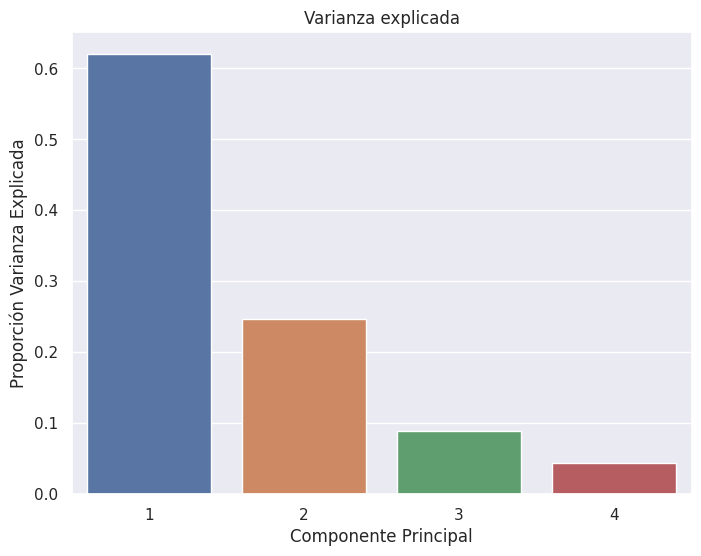

In [ ]:
#@title Graficar varianza explicada
sns.barplot(df_pct_varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Proporción Varianza Explicada')
plt.title('Varianza explicada')
plt.show()

De acuerdo con el criterio de Kaiser el valor de los KMO debe ser cercano a la unidad. En este caso usaremos autovalores iguales o superiores a 0.8

In [ ]:
autovalores_kaiser = autovalores[autovalores >= 0.8]
autovalores_kaiser

array([2.48024158, 0.98976515])

Por lo tanto, bajo este criterio debemos trabajar con 2 componentes.

A continuación generaremos dos array, uno con el porcentaje de varianza explicada de cada una de las componentes y luego otro con el total de varianza acumulada. Finalmente generaremos un DataFrame con dicha información.

In [ ]:
varianza_explicada=[]
varianza_explicada_acum =[]

# Loop para capturar la varianza explicada y la varianza explicada acumulada
for i in autovalores_kaiser:
    varianza_explicada.append((i)/sum(autovalores)*100)
    varianza_explicada_acum.append(sum(varianza_explicada))


# Generar DataFrame
matriz_var_expl = pd.DataFrame({'pct_var_expl': varianza_explicada,
                                'pct_var_expl_acum': varianza_explicada_acum
                               },
                               index=np.linspace(1,len(autovalores_kaiser),len(autovalores_kaiser)))


# Visualizar matriz
matriz_var_expl

,pct_var_expl,pct_var_expl_acum
1.0,62.006039,62.006039
2.0,24.744129,86.750168


### PCA con sklearn

#### Calculo de las Componentes principales indicando la cantidad de varianza

Observamos que nuestro modelo puede ser explicado por 2 variable nuevas obtenidas por medio de PCA. Estas variables explican un 76.86.75% de la varianza total de los datos.

A contunuación realizaremos lo mismo por medio del función PCA del módulo descomposition de la librería sklearn, pero usando solamente las características que tienen alta correlación.

In [ ]:
#@title Importar biblioteca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#@title Importar y Estandarizar dataset
import statsmodels.api as sm

# Cargar el conjunto de datos "USArrests"
data = sm.datasets.get_rdataset("USArrests",  "datasets").data

#Instanciar y aplicar fit_transfor
data_std =  StandardScaler().fit_transform(data)


# Generar dataframe desde los datos estandarizados, agregando nombre de columnas.
df_data_std = pd.DataFrame(data_std, columns=data.columns)

In [ ]:
#@title Aplicar función PCA
# se puede usar el parámetro n_components para indicar el número de componentes
pca = PCA()

# Entrenar y transformar dataset Normalizado. Esto genera un nuevo dataset reducido
data_std_pca = pca.fit_transform(data_std)

#Visualizar el porcentaje varianza explicada por cada una de las componentes.
pct_varianza_explicada = pca.explained_variance_ratio_
pct_varianza_explicada

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

__b. Indice KMO de Kaiser-Meyer-Olkin__

Ahora calcularemos los autovalores y los autovectores.
A nosotros nos interesará los autovalores ya estos son los que capturan la varianza de los datos dentro de la matriz de covarianza

In [ ]:
!pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(df_data_std)
print(f'KMO global: {kmo_model:.3f}')

Podemos usar PCA ya que el KMO es aceptable

In [ ]:
#@title Varianza acumulada
varianza_explicada=[]
varianza_explicada_acum =[]

# Loop para capturar la varianza explicada y la varianza explicada acumulada
for i in autovalores:
    varianza_explicada.append((i)/sum(autovalores)*100)
    varianza_explicada_acum.append(sum(varianza_explicada))


# Generar DataFrame
matriz_var_expl = pd.DataFrame({'pct_var_expl': varianza_explicada,
                                'pct_var_expl_acum': varianza_explicada_acum
                               },
                               index=np.linspace(1,len(autovalores), len(autovalores)))


# Visualizar matriz, solamente la cantidad de componentes sugerido el criterio de Kaiser.
matriz_var_expl.iloc[:,0:cantidad_autovalores_kaiser]


,pct_var_expl,pct_var_expl_acum
1.0,62.006039,62.006039
2.0,24.744129,86.750168
3.0,4.335752,91.085920
4.0,8.914080,100.000000


Con las **2 componentes** seleccionadas explicamos el **86.75%** de la varianza total de la data original. **Hemos llegado al mismo resultado.**

#### Calculo de las Componentes principales indicando la cantidad de componentes a usar

Ahora bien, cómo sabemos que son 2 las componentes que necesitamos para nuestro modelo, procederemos a realizar el mismo cálculo, pero indicando la cantidad de componentes a usar. Luego generaremos el Dataframe y uniremos a esta data reducida la variable explicada.

In [ ]:
#@title Importar bibliteca
from sklearn.decomposition import PCA

In [ ]:
#@title Aplicar función PCA
# se puede usar el parámetro n_components para indicar el número de componentes o
# el valor el ratio de varianza que se busca explicar. Si no se indica, la función calculará todas las componentes
pca = PCA(n_components=2)

In [ ]:
#@title Filt Transfor a dataset Normalizado. Esto genera un nuevo dataset reducido
pca_2 = pca.fit_transform(data_std)

In [ ]:
#@title Generar DataFrame de las componentes calculadas
columnas = ['CP1', 'CP2']
df_pca_2 = pd.DataFrame(pca_2 , columns=columnas)

# Data reducida en sus dimensionalidades
df_pca_2.head(3)

,CP1,CP2
0,0.985566,-1.133392
1,1.950138,-1.073213
2,1.763164,0.745957


Con esto hemos resulto nuestro problema de colinalidad. Para verificarlo, aplicaremos la matriz de correlaciones a la data reducida. Además, para facilitar la visualización, redondearemos el resultado a 14 decimales.

In [ ]:
#@title Matriz correlación Pearson
df_pca_2.corr(method = 'pearson').round(14)

,CP1,CP2
CP1,1.0,0.0
CP2,0.0,1.0


los valores de las correlaciones entre variables predictiva es cercano a cero, por tanto hemos resuelto nuestro problema de colinealidad

In [ ]:
#@title Obtener los loading para cada componente (autovector)
pca = PCA(n_components=4)  # Especifica el número de componentes principales que deseas
df_reduced_pca = pca.fit(data_std)  # Ajusta el modelo PCA a tus datos
# Generar DataFrame con los loading
df_loading = pd.DataFrame(pca.components_.T, columns=['CP 1', 'CP 2', 'CP 3', 'CP 4'], index=data.columns)
df_loading

,CP 1,CP 2,CP 3,CP 4
Murder,0.535899,-0.418181,-0.341233,-0.649228
Assault,0.583184,-0.187986,-0.268148,0.743407
UrbanPop,0.278191,0.872806,-0.378016,-0.133878
Rape,0.543432,0.167319,0.817778,-0.089024


Analizar con detalle el vector de loadings que forma cada componente puede ayudar a interpretar que tipo de información recoge cada una de ellas. Por ejemplo, la primera componente es el resultado de la siguiente combinación lineal de las variables originales:

$PC1 = 0.535899 * Murder + 0.583184 * Assault + 0.278191 * UrbanPop + 0.543432 * Rape$

El hecho de que esta componente recoga mayoritariamente información de las variables $Murder$, $Assault$, $Rape$ implica que esta componente recoge información acerca de delitos. En tanto la segunda componente, es la variable $UrbanPop$ la que recoge mayor peso, correspondiendo a datos de urbanización.


In [ ]:
# Calculo PC1 por Estado
for i in range(10):
  print(data.index[i],': ',(df_data_std.loc[i] * df_loading['CP 1']).sum())

Alabama :  0.9855658845031429
Alaska :  1.9501377503350237
Arizona :  1.7631635397229846
Arkansas :  -0.14142028986835564
California :  2.523980126519252
Colorado :  1.5145628611015864
Connecticut :  -1.358647459854355
Delaware :  0.04770930906002435
Florida :  3.0130422702872233
Georgia :  1.6392830428359113


In [ ]:
#@title Calculo de las componentes principales para cada valor
puntajes = np.dot(df_data_std, pca.components_.T)

In [ ]:
#@title Valor de las componentes principales para cada observación (principal component scores)
df_puntajes = pd.DataFrame(puntajes, columns=['CP 1', 'CP 2', 'CP 3', 'CP 4'] ,index = data.index)
df_puntajes

,CP 1,CP 2,CP 3,CP 4
rownames,,,,
Alabama,0.985566,-1.133392,-0.444269,-0.156267
Alaska,1.950138,-1.073213,2.040003,0.438583
Arizona,1.763164,0.745957,0.054781,0.834653
Arkansas,-0.141420,-1.119797,0.114574,0.182811
California,2.523980,1.542934,0.598557,0.341996
Colorado,1.514563,0.987555,1.095007,-0.001465
Connecticut,-1.358647,1.088928,-0.643258,0.118469
Delaware,0.047709,0.325359,-0.718633,0.881978
Florida,3.013042,-0.039229,-0.576829,0.096285


/tmp/ipython-input-45-771358900.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df_puntajes['CP 1'][i], df_puntajes['CP 2'][i]), fontsize=9)


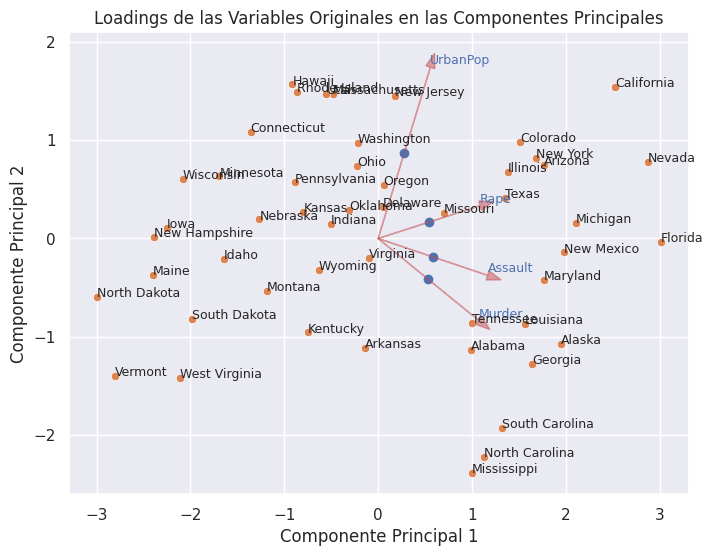

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que `df_loading` es tu DataFrame con los loadings de las componentes principales
# y `df_puntajes` es tu DataFrame con los puntajes de las componentes principales

# Crear un gráfico de dispersión para los loadings de la Componente Principal 1 y 2
plt.figure(figsize=(8, 6))
plt.scatter(df_loading['CP 1'], df_loading['CP 2'])

# Utilizar seaborn para agregar un gráfico de dispersión con los puntajes de las componentes principales
sns.scatterplot(x='CP 1', y='CP 2', data=df_puntajes)

plt.title('Loadings de las Variables Originales en las Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Agregar flechas para representar los loadings
for i, variable in enumerate(df_loading.index):
    scale_factor = 2  # Factor de escala para alargar las flechas
    plt.arrow(0, 0, scale_factor * df_loading.loc[variable, 'CP 1'], scale_factor * df_loading.loc[variable, 'CP 2'],
              color='r', alpha=0.5, head_width=0.1)
    plt.text(scale_factor * df_loading.loc[variable, 'CP 1'], scale_factor * df_loading.loc[variable, 'CP 2'],
             variable, fontsize=9, color='b', ha='left', va='bottom')

# Agregar nombres de los índices en los puntos de los puntajes
for i, txt in enumerate(df_puntajes.index):
    plt.annotate(txt, (df_puntajes['CP 1'][i], df_puntajes['CP 2'][i]), fontsize=9)

plt.grid(True)
plt.show()


In [ ]:
pca = PCA(n_components=2)  # Especifica el número de componentes principales que deseas
df_reduced_pca = pca.fit(data_std)  # Ajusta el modelo PCA a tus datos
# Generar DataFrame con los loading
df_loading = pd.DataFrame(pca.components_.T, columns=['CP 1', 'CP 2'], index=data.columns)
df_loading

,CP 1,CP 2
Murder,0.535899,0.418181
Assault,0.583184,0.187986
UrbanPop,0.278191,-0.872806
Rape,0.543432,-0.167319
